## 随机森林

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

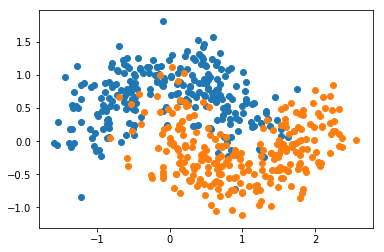

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 随机森林

In [4]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林具有一定的随机性，如样本抽取的随机性
# 或者维度抽取的随机性
# 由于随机森林的随机抽取特性，会有一些数据样本从来不会被抽取到
# 可以传入参数 oob_score=True （out of bad 的 那些样本）
# ==> 表明使用那些从来不会被抽取到的样本作为测试数据集测试
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=666, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [5]:
rf_clf.oob_score_

0.89200000000000002

In [6]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True, random_state=666, n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.90600000000000003

随机森林拥有决策树和BaggingClassifier的所有参数：）

### Extra-Trees
Extra-Trees ==> 极其随机的随机森林

决策树在节点的划分上，使用随机的特征和随机的阀值。提供额外的随机性，抑制过拟合，但增大了偏差 bias

这样也就有了更快的学习速度

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=666, n_jobs=-1)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=666, verbose=0, warm_start=False)

In [8]:
et_clf.oob_score_

0.89200000000000002

### 集成学习解决回归问题

In [9]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor